In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import calendar
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-v0_8')
import seaborn as sns

# Colors
red, green, blue, yellow = '#FF6B6B', '#6BCB77', '#4D96FF', '#FFD93D'

# Data

In [2]:
# Data
df = sns.load_dataset('taxis')

In [3]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [5]:
df.describe(datetime_is_numeric=True)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [6]:
df.describe(include='O')

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


These data record cab trips in New York City during the month of March 2019.

In [7]:
# duplicates
df.duplicated().sum()

0

In [8]:
# is_null percentage
round(df.isnull().sum()*100 / len(df), 4)

pickup             0.0000
dropoff            0.0000
passengers         0.0000
distance           0.0000
fare               0.0000
tip                0.0000
tolls              0.0000
total              0.0000
color              0.0000
payment            0.6840
pickup_zone        0.4042
dropoff_zone       0.6995
pickup_borough     0.4042
dropoff_borough    0.6995
dtype: float64

Less than 1% of values are missing for each variable. We're going to drop the concerned observations.

In [9]:
df.dropna(inplace=True)

From `pickup` and `dropoff`, referring respectively to the start and end of the trip, we will create 3 new variables:
- `trip_duration`, the duration of the trip in seconds;
- `weekday`, the day of the week on which the trip begins;
- `hour`, the time at which the trip took place (this variable may evolve into `part_of_day`, a cut version with `morning`, `afternoon`, `evening` and `night` as categories).

We will then remove `pickup` and `dropoff` from our dataset.

In [10]:
df['trip_duration'] = (df['dropoff'] - df['pickup']).dt.total_seconds()
df['weekday'] = pd.Categorical(df['pickup'].dt.strftime('%a'),
                               categories=list(calendar.day_abbr)) # they're categorical variables
df['hour'] = df['pickup'].dt.hour.astype('category')               # although their numerical values
df.drop(['pickup', 'dropoff'], axis=1, inplace=True)

In [11]:
df.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_duration,weekday,hour
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,375.0,Sat,20
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,425.0,Mon,16
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,444.0,Wed,17
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1552.0,Sun,1
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,572.0,Sat,13


# Univariate Analysis

In [12]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O'),
       CategoricalDtype(categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=False),
       CategoricalDtype(categories=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                         15, 16, 17, 18, 19, 20, 21, 22, 23],
       , ordered=False)                                                                        ],
      dtype=object)

## Numerical variables

### Discrete variables

In [13]:
discrete_vars = df.select_dtypes(include='int64').columns
print(f'{len(discrete_vars)} discrete variable(s): {list(discrete_vars)}.')

1 discrete variable(s): ['passengers'].


In [14]:
n_samples = len(df)

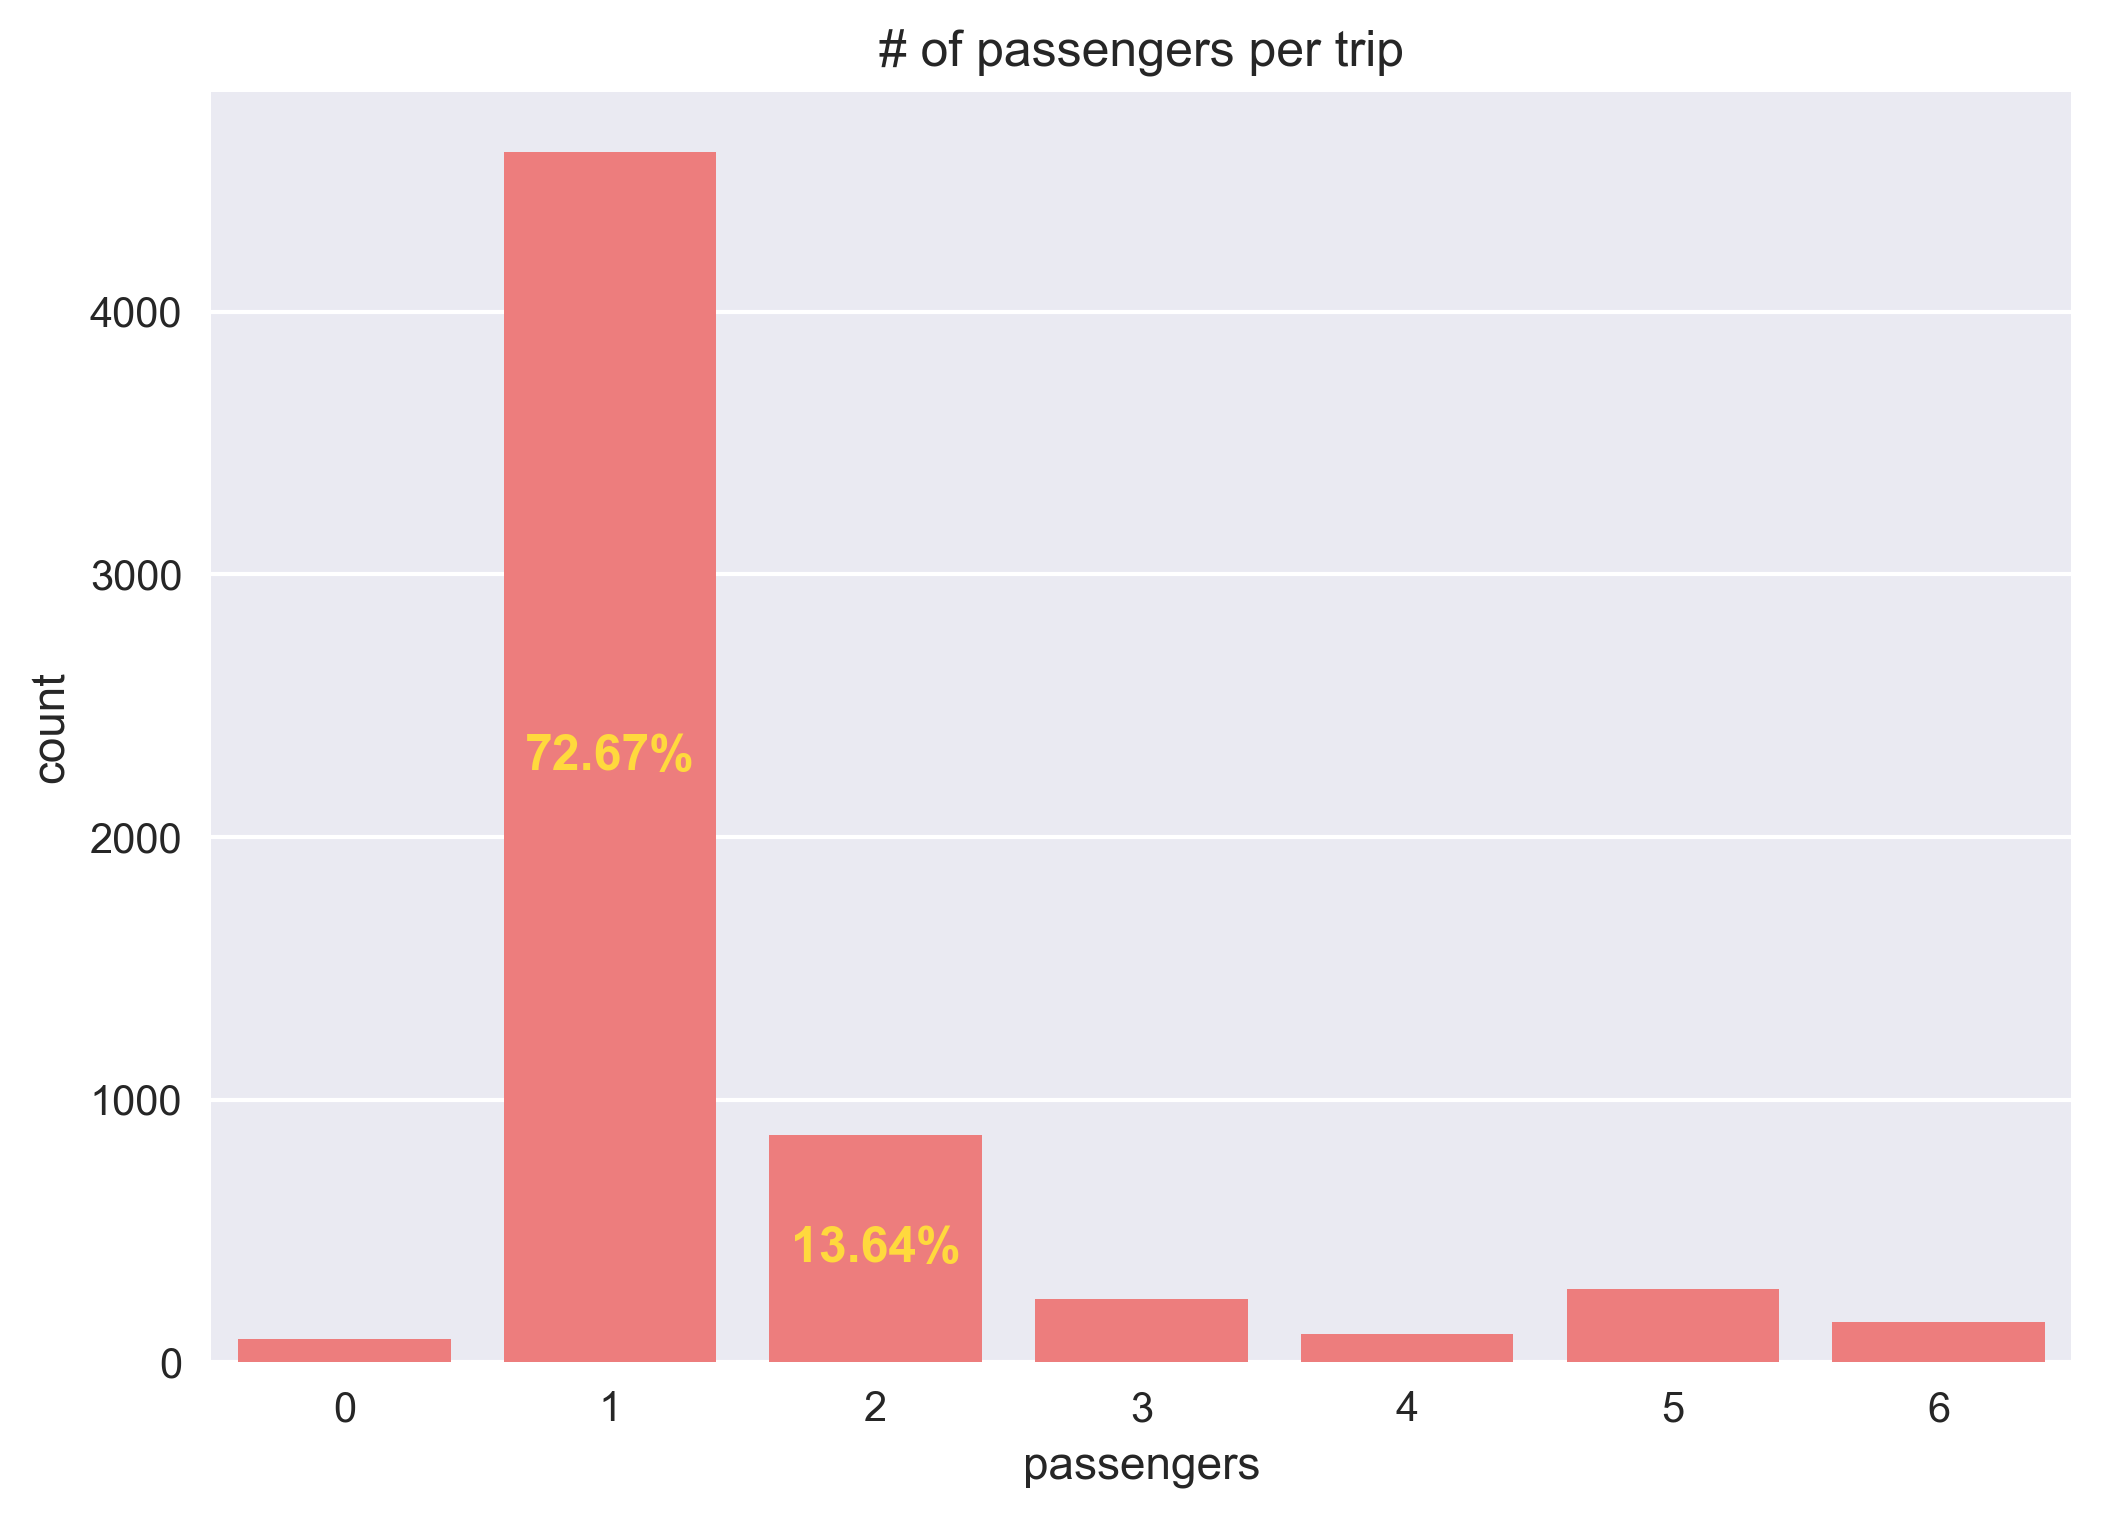

In [15]:
# Barplot
sns.countplot(data=df, x=discrete_vars.item(), color=red)

# Annotation (value percentage)
for bar in plt.gca().patches:
    pct = bar.get_height() / n_samples
    if pct > .1:
        plt.gca().annotate(f'{pct:.2%}', (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                           ha='center', va='center', size=12, color=yellow, fontweight=600)

plt.title('# of passengers per trip')
plt.show()

- Most of trips involve only one passenger, and it's rare to have more than two.
- Some trips have no passengers, it sounds weird at first, but there are some explanations to this such as initial/minimum fare, booking fees/surcharges, miscommunication and technical errors.

### Continuous variables

In [16]:
continuous_vars = df.select_dtypes(include='float64').columns
print(f'{len(continuous_vars)} continuous variable(s): {list(continuous_vars)}.')

6 continuous variable(s): ['distance', 'fare', 'tip', 'tolls', 'total', 'trip_duration'].


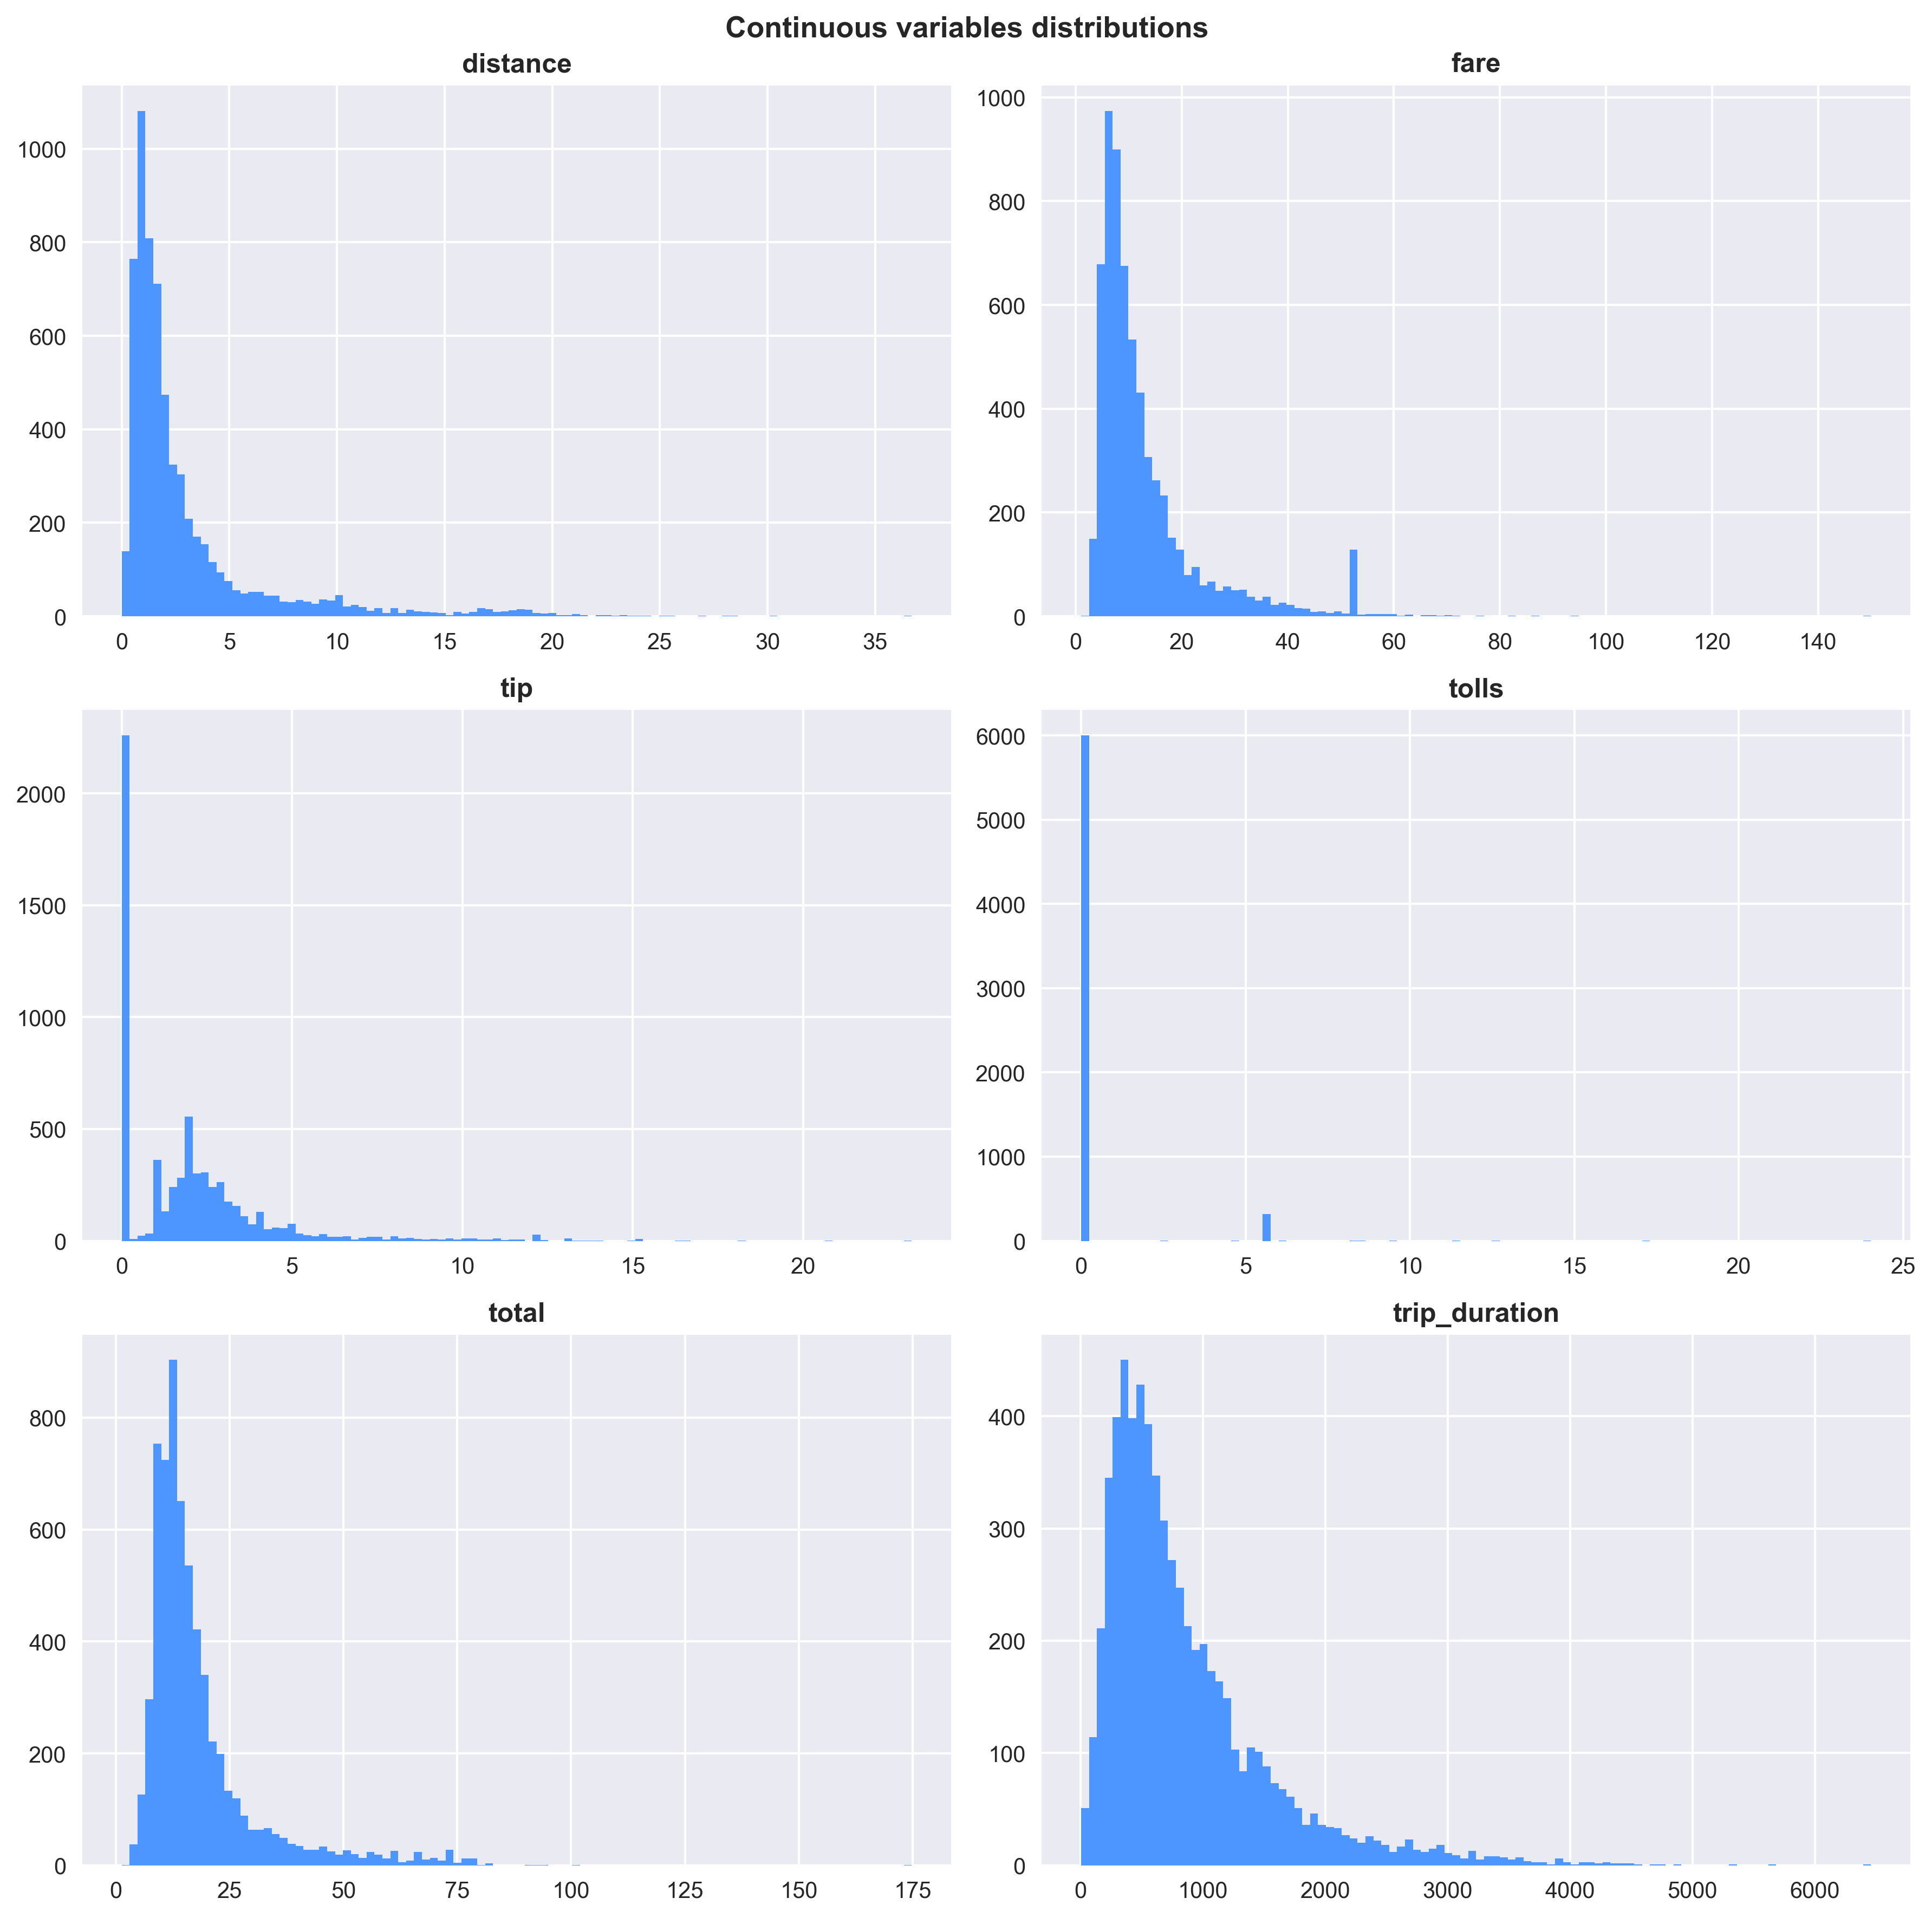

In [17]:

# Histograms
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

for i in range(3):
    for j in range(2):            
        var = continuous_vars[2*i+j]
        ax[i, j].hist(df[var], bins=100, color=blue)
        ax[i, j].set_title(var, weight=600)

plt.suptitle('Continuous variables distributions', size=13, weight=600)
plt.tight_layout()
plt.show()

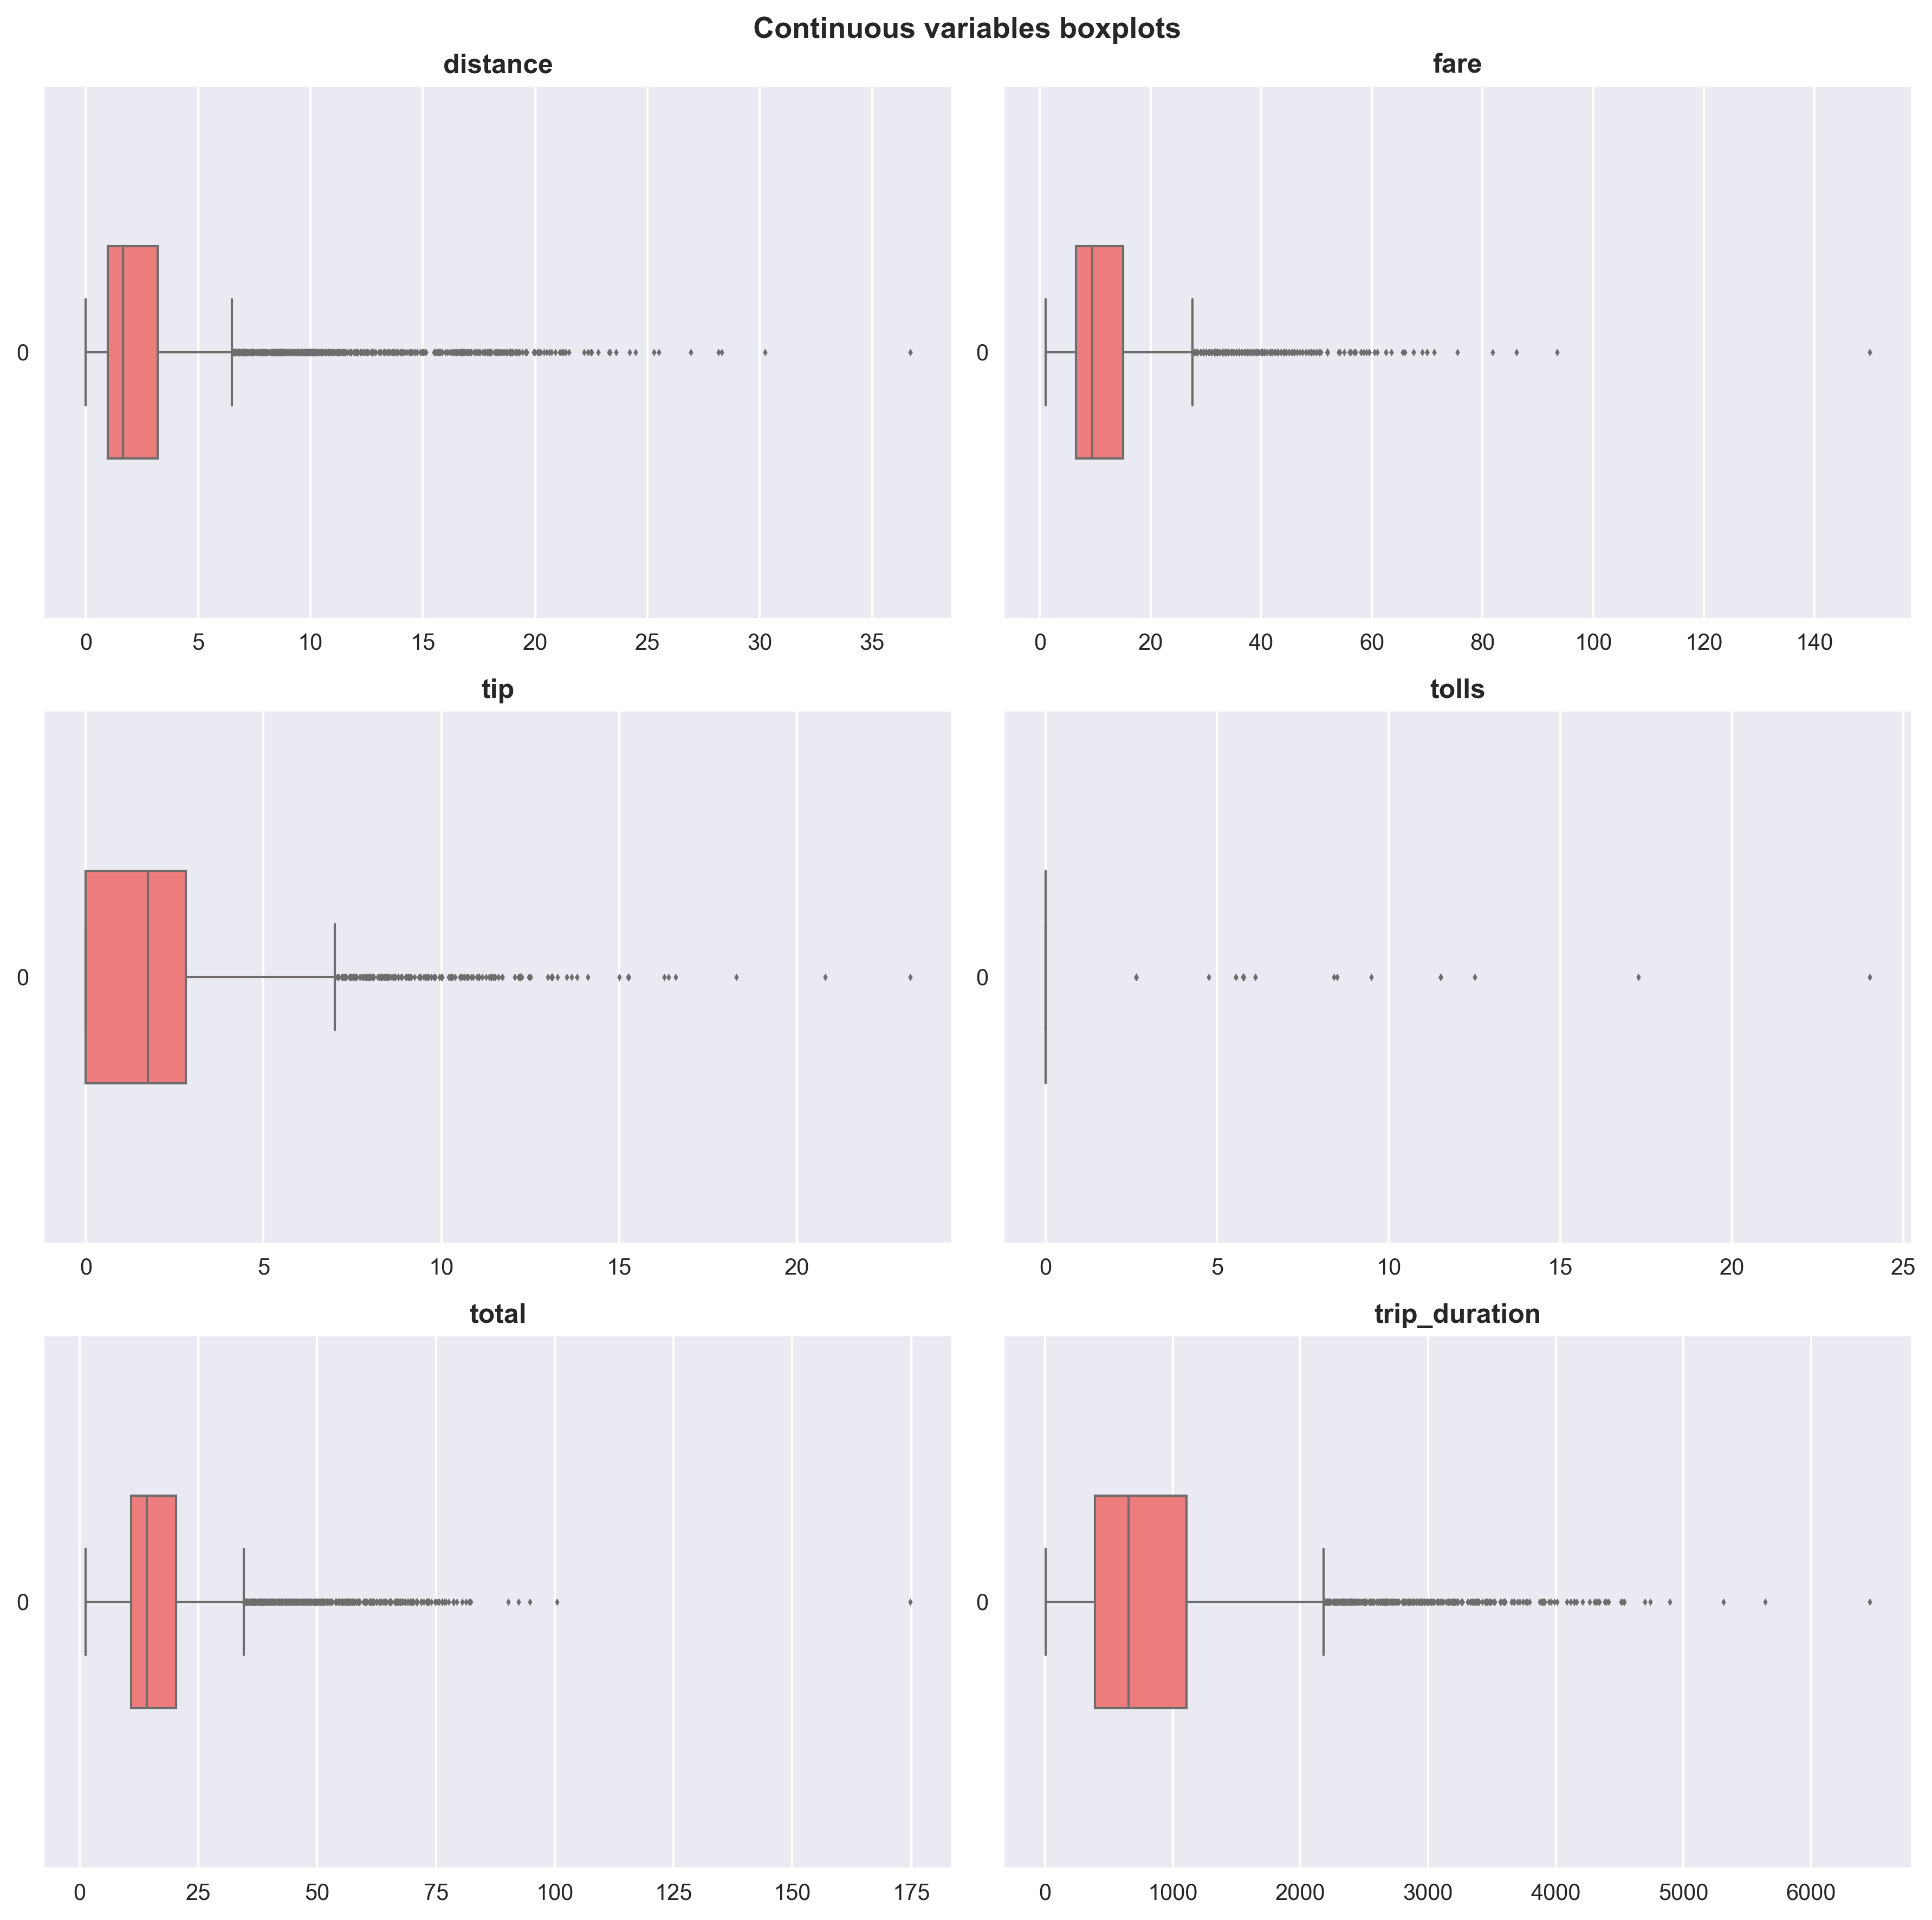

In [18]:
# Boxplots
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

for i in range(3):
    for j in range(2):            
        var = continuous_vars[2*i+j]
        sns.boxplot(df[var], orient='h', color=red, width=.4, fliersize=1, linewidth=1, ax=ax[i, j])
        ax[i, j].set_title(var, weight=600)

plt.suptitle('Continuous variables boxplots', size=13, weight=600)
plt.tight_layout()
plt.show()

The distributions are right-skewed with a lot of outliers at the right; while most rides are just "normal", a few ones can be very long, and induce higher fares, increase the number of toll stations enocountered, etc. 

## Categorical variables

In [19]:
categorical_vars = df.select_dtypes(exclude=['int64', 'float64']).columns
print(f'{len(categorical_vars)} categorical variables: {list(categorical_vars)}.')

8 categorical variables: ['color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough', 'weekday', 'hour'].


In [20]:
# Unique values
[(var, len(df[var].unique())) for var in categorical_vars]

[('color', 2),
 ('payment', 2),
 ('pickup_zone', 194),
 ('dropoff_zone', 203),
 ('pickup_borough', 4),
 ('dropoff_borough', 5),
 ('weekday', 7),
 ('hour', 24)]

### Variables with "few" categories

In [21]:
vars_with_few_categories = [var for var in categorical_vars if len(df[var].unique()) <= 25]
vars_with_few_categories

['color', 'payment', 'pickup_borough', 'dropoff_borough', 'weekday', 'hour']

In [22]:
print(f'{len(vars_with_few_categories)} categorical variables with few categories.')

6 categorical variables with few categories.


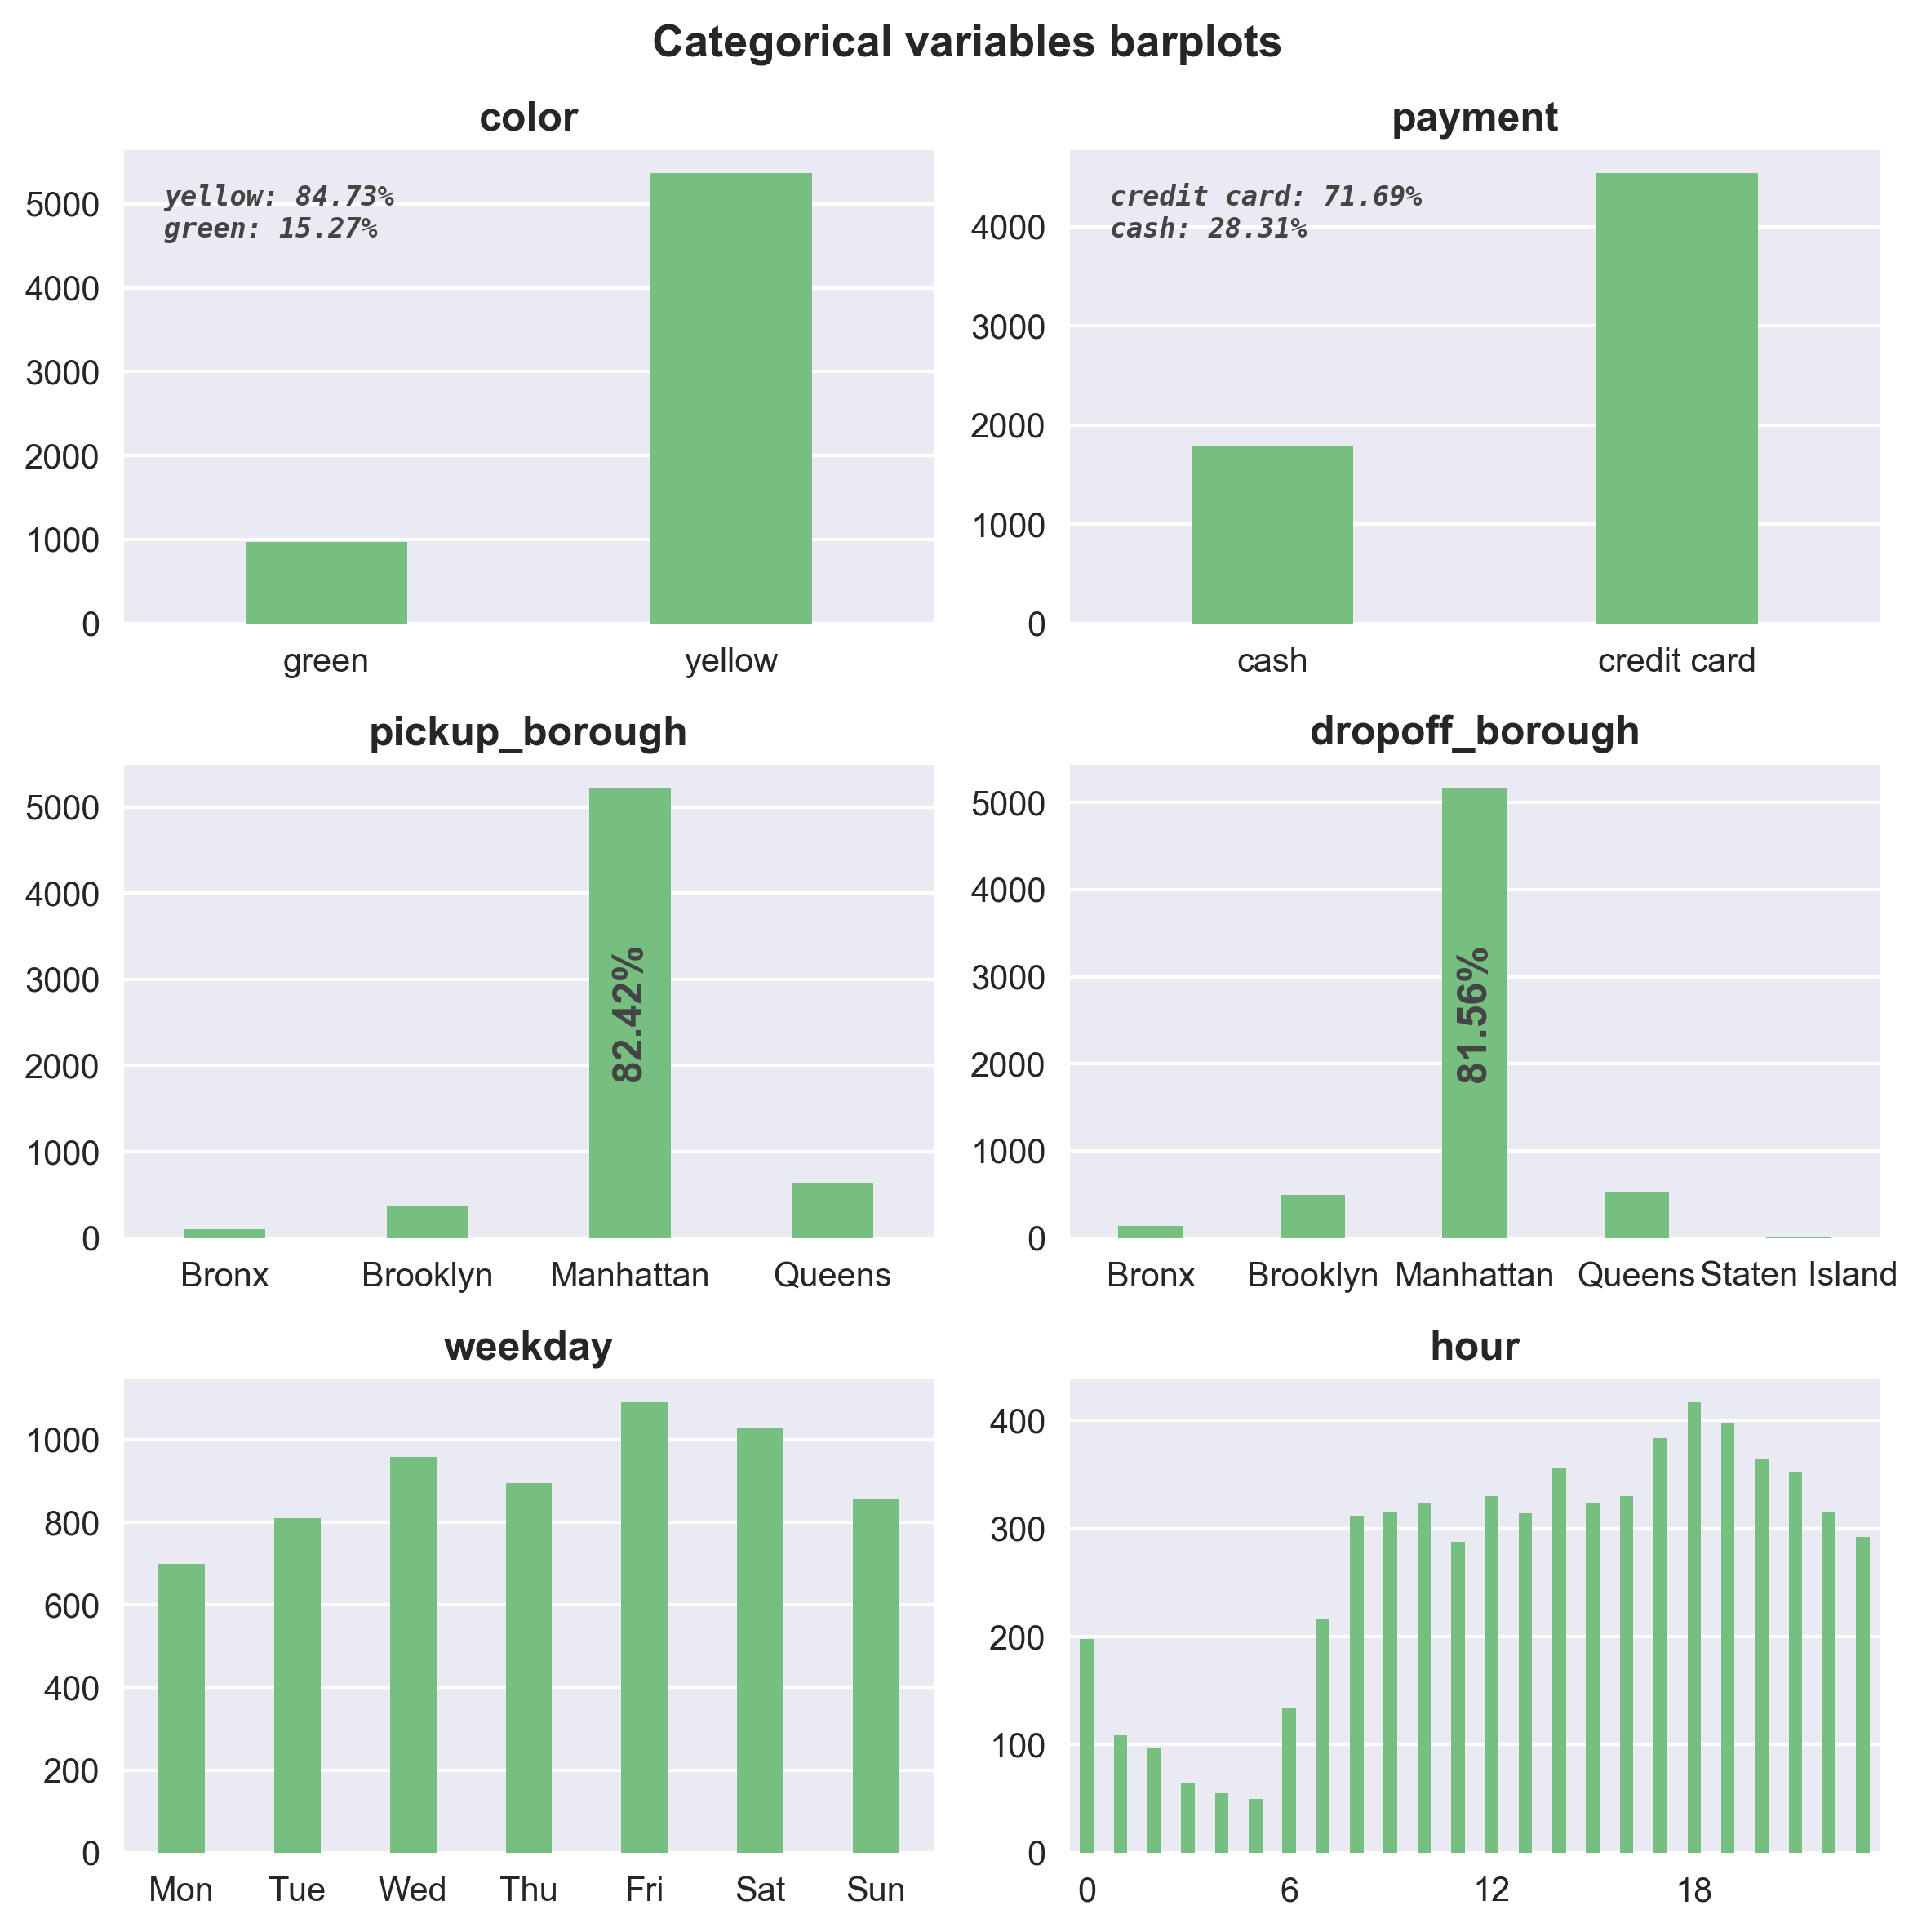

In [23]:
# Barplots
fig, ax = plt.subplots(3, 2, figsize=(8, 8))

for i in range(3):
    for j in range(2):
        var = vars_with_few_categories[2*i+j]
        sns.countplot(data=df.sort_values(var), x=var, color=green, width=.4, ax=ax[i, j])
        ax[i, j].set_title(var, weight=600)
        ax[i, j].set(xlabel='', ylabel='')
        
        # Annotations        
        if var in ['color', 'payment']:
            value_counts = df[var].value_counts(normalize=True)
            text = ''
            for index, frequency in value_counts.items():
                text += f'{index}: {frequency:.2%}\n'
            ax[i, j].text(.05, .75, text, color='#444', family='monospace', size=8,
                          style='italic', weight=600, transform=ax[i, j].transAxes)

        elif var in ['pickup_borough', 'dropoff_borough']:
            for bar in ax[i, j].patches:
                pct = bar.get_height() / n_samples
                if pct > .15:
                    xy = (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2)
                    ax[i, j].annotate(f'{pct:.2%}', xy, ha='center', va='center',
                                      size=12, color='#444', fontweight=600, rotation=90)

# hours xticks
ax[2, 1].set_xticks(np.arange(0, 24, 6))

plt.suptitle('Categorical variables barplots', size=13, weight=600)
plt.tight_layout()
plt.show()

- Most of trips are handled by yellow taxis $(84.73\%)$ and paid out with credit cards $(71.69\%)$
- A very low number of trips are recorded outside Manhattan $(<20\%)$
- Although there's no major difference between the number of trips per day, it's worth noting that the most important traffic occur during the weekend (Fri-Sun)
- This hours distribution suggests three main trip periods: $[0-8[$, $[8, 17[$, and $[17, 23]$. Of course realizing this cut may cause a loss of information, but the bivariate analysis results could be interpreted easier.

### Variables with "many" categories (top-flop study)

In [24]:
[var for var in categorical_vars if var not in vars_with_few_categories]

['pickup_zone', 'dropoff_zone']

In [25]:
# Pickups
pickups_summary = df.groupby(['pickup_borough', 'pickup_zone'], as_index=False) \
                    .size().sort_values('size', ascending=False)
top_pickups, flop_pickups = pickups_summary.iloc[:10], pickups_summary.iloc[-10:]
empty_line = pd.DataFrame({'pickup_borough': ['-'], 'pickup_zone': ['-'], 'size': ['-']})
top_flop_pickups = pd.concat([top_pickups, empty_line, flop_pickups], ignore_index=True)
top_flop_pickups

,pickup_borough,pickup_zone,size
0,Manhattan,Midtown Center,227
1,Manhattan,Penn Station/Madison Sq West,209
2,Manhattan,Upper East Side South,208
3,Manhattan,Clinton East,208
4,Manhattan,Midtown East,196
5,Manhattan,Upper East Side North,185
6,Manhattan,Times Sq/Theatre District,182
7,Manhattan,Union Sq,180
8,Manhattan,Lincoln Square East,176
9,Manhattan,Murray Hill,159


In [26]:
# Dropoffs
dropoffs_summary = df.groupby(['dropoff_borough', 'dropoff_zone'], as_index=False) \
                    .size().sort_values('size', ascending=False)
top_dropoffs, flop_dropoffs = dropoffs_summary.iloc[:10], dropoffs_summary.iloc[-10:]
empty_line = pd.DataFrame({'dropoff_borough': ['-'], 'dropoff_zone': ['-'], 'size': ['-']})
top_flop_dropoffs = pd.concat([top_dropoffs, empty_line, flop_dropoffs], ignore_index=True)
top_flop_dropoffs

,dropoff_borough,dropoff_zone,size
0,Manhattan,Upper East Side North,244
1,Manhattan,Murray Hill,217
2,Manhattan,Midtown Center,215
3,Manhattan,Midtown East,175
4,Manhattan,Upper East Side South,173
5,Manhattan,Times Sq/Theatre District,158
6,Manhattan,Lincoln Square East,154
7,Manhattan,Clinton East,151
8,Manhattan,East Village,150
9,Manhattan,Penn Station/Madison Sq West,147


Obviously most of the pickup and dropoff zones are inside Manhatthan, while the other boroughs receive less traffic.

In [27]:
# Tops intersection
A, B = top_pickups['pickup_zone'], top_dropoffs['dropoff_zone']
top_pickups_n_dropoffs = set(A).intersection(set(B))
top_pickups_n_dropoffs, f'{len(top_pickups_n_dropoffs)} / 10'

({'Clinton East',
  'Lincoln Square East',
  'Midtown Center',
  'Midtown East',
  'Murray Hill',
  'Penn Station/Madison Sq West',
  'Times Sq/Theatre District',
  'Upper East Side North',
  'Upper East Side South'},
 '9 / 10')

The famous pickup and dropoff zones are quite similar.

# Bivariate analysis

Upcoming...